## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по определению типа вина

Датасет содержит следующие колонки:
- alcohol - содержание алкоголя в напитке
- malic_acid - яблочная кислота
- ash - пепел
- alcalinity_of_ash - щелочные золы
- magnesium - магний
- total_phenols - общие фенолы
- flavanoids - флаваноиды
- nonflavanoid_phenols - нефлаваноидные фенолы
- proanthocyanins - проантоцианы
- color_intensity - интенсивность цвета
- hue - оттенок
- od280/od315_of_diluted_wines - OD280 / OD315 разбавленных вин
- proline - пролин
- target - класс

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки sklearn.

Для дальнейшей работы необходимо преобразовать данные в DataFrame

In [2]:
cancer = load_breast_cancer()
data=pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])

# 2) Основные характеристики датасета

In [4]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
# Размер датасета - 178 строк, 14 колонок
print('Всего строк: {}\nВсего колонок: {}'.format(data.shape[0], data.shape[1]))

Всего строк: 569
Всего колонок: 31


In [6]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

mean radius - 0
mean texture - 0
mean perimeter - 0
mean area - 0
mean smoothness - 0
mean compactness - 0
mean concavity - 0
mean concave points - 0
mean symmetry - 0
mean fractal dimension - 0
radius error - 0
texture error - 0
perimeter error - 0
area error - 0
smoothness error - 0
compactness error - 0
concavity error - 0
concave points error - 0
symmetry error - 0
fractal dimension error - 0
worst radius - 0
worst texture - 0
worst perimeter - 0
worst area - 0
worst smoothness - 0
worst compactness - 0
worst concavity - 0
worst concave points - 0
worst symmetry - 0
worst fractal dimension - 0
target - 0


In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

<Axes: xlabel='mean area', ylabel='worst area'>

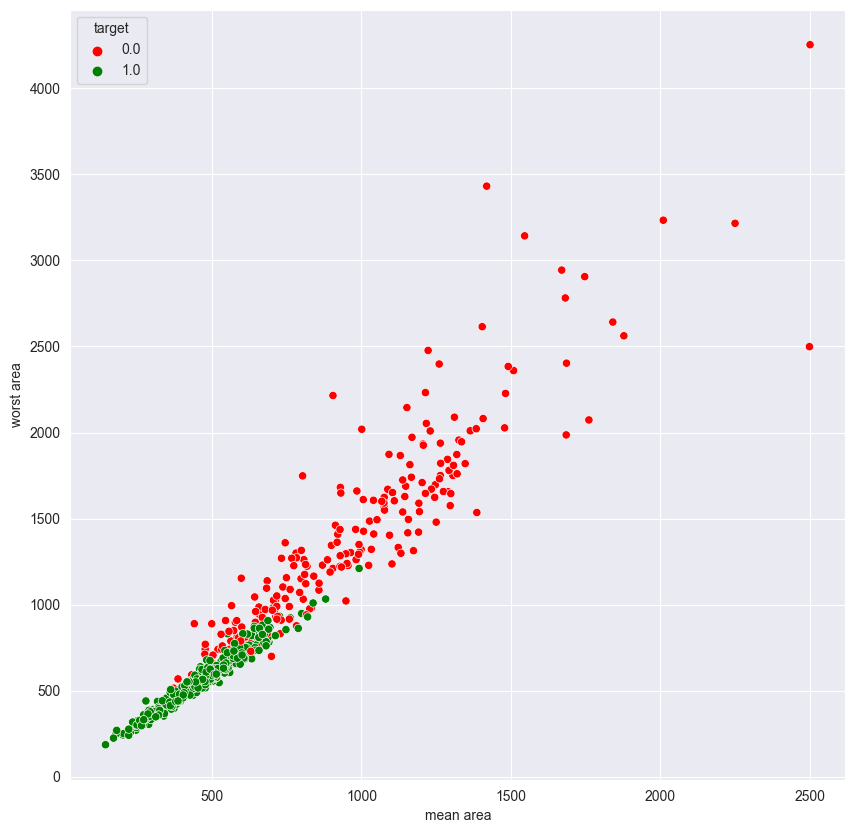

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='mean area', y='worst area', data=data, hue='target', palette=['red','green'])

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.displot(data['mean area'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

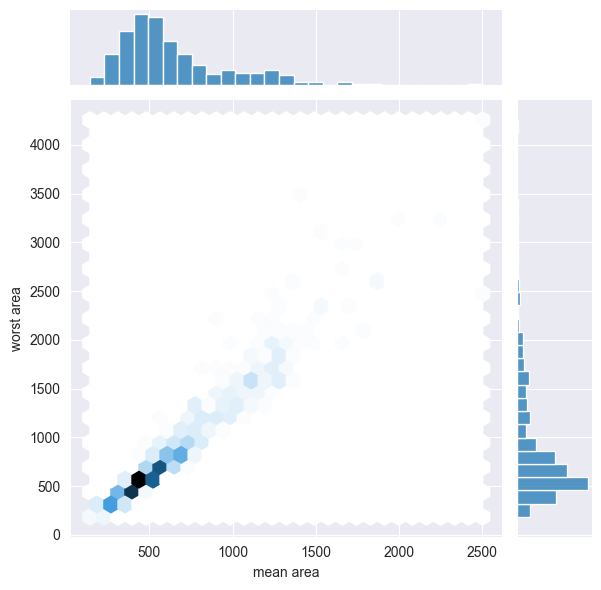

In [11]:
sns.jointplot(x='mean area', y='worst area', data=data,  kind="hex")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

In [ ]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

In [ ]:
sns.pairplot(data, hue="target", palette=['red','green'])

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

In [ ]:
# Распределение параметра texture сгруппированные по target.
sns.boxplot(x='target', y='texture', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

In [ ]:
sns.violinplot(x=data['texture'])

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['texture'])
sns.distplot(data['texture'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

In [ ]:
# Распределение параметра texture сгруппированные по target.
sns.violinplot(x='target', y='texture', data=data)

In [ ]:
sns.catplot(y='texture', x='target', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "target"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [ ]:
data.corr()

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с концентрацией флаваноидов (-0.85), концентрацией OD280 / OD315 разбавленных вин (-0.79) и с общей концентрацией фенолов (-0.72). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с концентрацией пролина (-0.63), оттенком (-0.62), щелочными золами (0.52) и концентрацией проантоцианов (-0.5). Эти признаки стоит также оставить в модели.
- Общее кол-во фенолов и концентрация флаваноидов очень сильно коррелируют между собой (0.86). Поэтому из этих признаков в модели можно оставлять только один. 
- Также можно сделать вывод, что выбирая из концентрации флаваноидов и общим кол-во фенолов лучше выбрать флаваноиды, потому что он сильнее коррелирован с целевым признаком.

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(28,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')